## Introduction 

In a world so dominated by technology, which is continually advancing, the humble board game industry is evolving at an even faster pace. Board games have become more popular than ever thanks to a range of modern technological advancements from the ability to fund independent game ideas to the inclusion of apps and online interactions in gameplay.
Gone are the days, when board gaming was just a hobby and making full-time income designing games was a pipe dream. With the recent Kickstarter campaign where Exploding Kittens has raised close to 9 million, the gates of opportunities have never been more open. According to the PR Newswire, the global board game market is predicted to exceed $12 billion by the year 2023.(Boargamesland,2023).

In this project a Board Games Data set will be analyzed using different Visualizations in order to answer different questions that have been asked by the Stakeholder. 

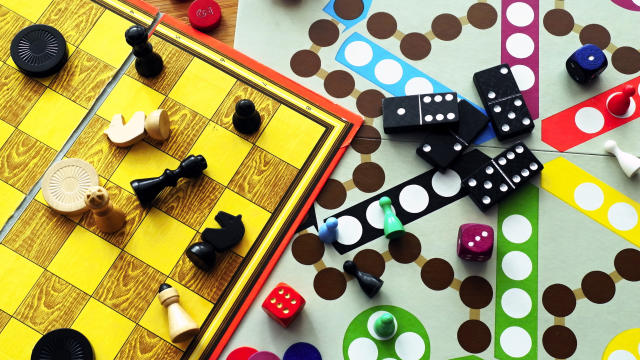

In [1]:
from IPython.display import Image
Image(filename =r'Boardimage.jpeg')

## Business Understanding

Board games are tabletop games that are played on a flat surface, usually  using pieces or counters moved or placed on a pre-marked board or surface. Some of them are very simple but other can be complex even for most experienced players. Board games that require strategy, skill, and planning. Board games can be played individually or in groups, and often involve social interaction and communication between players.

This Data set must be analyzed in order to get statistical information that will help us to better understand the market and how board games can be improved to get better ratings. This analysis will also help to see how older games and new games have been performing throughout the years.

## Data Understanding

This dataset contains information about board games from 1950 to 2016. It has 22 columns and 10532 rows.
It is mainly composed by the following features:
Board game id

Game Description 

Name

Year published

Miniminum number of players recommended

Maximum number of players recommended

Playing time

Max Play Time

Min Play Time

Artist

Designer

Number of users that rated the game

Average rating received by the game

Mechanics used by the game

User Rated

Average Rating

Board game domains that the game belongs to   

# Loading libraries and data set

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as pt
from pandas.plotting import scatter_matrix
import seaborn as sns 

In [3]:
df= pd.read_csv('board_games.csv')
df.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

Function head() help us to show the first five rows in ourdata set and function info() allow us to see all the features and its data type.

From the charts above we can see that this data set has 22 Columns and 10,532 data points. It contains both numerical and categorical data, besides that some variables have missing data, Specially, **expansion and compilation** variables

In [5]:
df.isna().sum()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

Function isna() and sum() allow to see how many missing values we have in each feature.

In the chart above we can see how many missing values we have in every variable. As we expected expansion and compilation varibales have more missing values than the others. for our analysis we dont really need to clean this dataset at the moment so we will leave it like that for now.

## 1- What are the top 5 “average rated” games?

Answer:
1. Small World Designer Edition

2. Kingdom Death: Monster

3. Terra Mystica: Big Box

4. Last Chance for Victory

5. The Greatest Day: Sword Juno, and Gold Beaches

First I have created a data set that only contains the name of the game and average rating. I have done that by selecting only those two varible from the original dataset. The reason why is because we want to know the name of top 5 average rated games.

In [6]:
df2 = df[['name', 'average_rating']]
df2.head()

,name,average_rating
0,Die Macher,7.66508
1,Dragonmaster,6.60815
2,Samurai,7.44119
3,Tal der Könige,6.60675
4,Acquire,7.35830


The stakeholder wants to know which are the top 5 “average rated” games, so I have filtered a dataset that only show those two variales as you can see above.

In order to know the top five average rated games, I have used function nlargest() and enter the number 5 because that is the top that we need. As we can see the top five are displayed but we dont know the name of this games yet.

In [7]:
topfive= df2['average_rating'].nlargest(5)
topfive.head()

8348    9.00392
6392    8.93184
9964    8.84862
8526    8.84603
9675    8.83081
Name: average_rating, dtype: float64

In [8]:
rating_to_filter = [9.00392,8.93184,8.84862,8.84603,8.83081]
topfive_games = df2[df2['average_rating'].isin(rating_to_filter)]

topfive_games.head()

,name,average_rating
6392,Kingdom Death: Monster,8.93184
8348,Small World Designer Edition,9.00392
8526,Last Chance for Victory,8.84603
9675,"The Greatest Day: Sword, Juno, and Gold Beaches",8.83081
9964,Terra Mystica: Big Box,8.84862


Finally I have filtered the top five average rated games with their names using funtion isin() and selecting exactly what we need to display. Now we can plot this table using seaborn or matplotlib

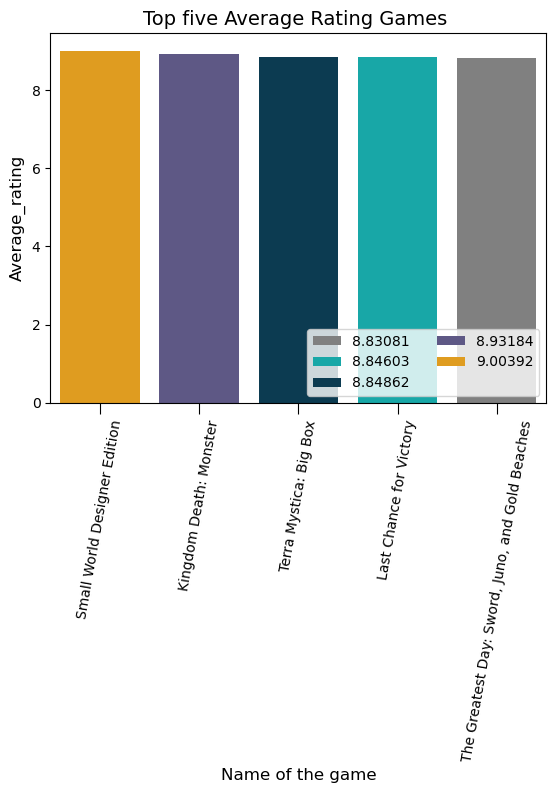

In [9]:
ax = sns.barplot(x='name', y='average_rating', hue= 'average_rating',palette=["grey","c","#003f5c",'#58508d','#ffa600'],dodge=False,data=topfive_games,
                 order=["Small World Designer Edition","Kingdom Death: Monster",'Terra Mystica: Big Box','Last Chance for Victory','The Greatest Day: Sword, Juno, and Gold Beaches']);
ax.legend(loc='lower right', ncol=2);
pt.title("Top five Average Rating Games ",color="black",size=14)
ax.set_xlabel('Name of the game', fontdict={'fontsize' : 12});
ax.set_ylabel('Average_rating', fontdict={'fontsize' : 12});
pt.tick_params(axis='x', labelrotation=80, size=8)

I have used a Bar graph to plot the top five average rated games, because this is the best way to visualise different variables that we want to compare or show their categories. They also have different colors to represent each of the Games clearly. Orange is a more vivid color to represent the best average and grey show less importance so I used it to represent the last game in terms of average rated. Also I have used customized matte colors so they dont look too bright. I have used function hue.() to show average rated value for each game because bars have alsmost same hheight,so showing the numbers helpt to see which bar is greater than the other.  and I have used dodge=False, so the graph and colors are not affected by hue.

The title size is a bit bigger than axis because It is importante to understand it just by reading the title and in this way is more visual. Rotation has been used on the name of the games so they can better fit in this plot.

## 1.2
The stakeholder might be also interested in knowing the name of the designer of these game, in case they want to buy a game from top designers so I have also plot a bar graph showinng the artist for each game. Same colors as previous graph have been used to represent same games and also designers in this case.

In [10]:
df3 = df[['name', 'average_rating','designer','year_published']]
df3.head()

,name,average_rating,designer,year_published
0,Die Macher,7.66508,Karl-Heinz Schmiel,1986
1,Dragonmaster,6.60815,"G. W. ""Jerry"" D'Arcey",1981
2,Samurai,7.44119,Reiner Knizia,1998
3,Tal der Könige,6.60675,Christian Beierer,1992
4,Acquire,7.35830,Sid Sackson,1964


In [11]:
rating_to_filter = [9.00392,8.93184,8.84862,8.84603,8.83081]
topfive_games2 = df3[df3['average_rating'].isin(rating_to_filter)]

topfive_games2.head()

,name,average_rating,designer,year_published
6392,Kingdom Death: Monster,8.93184,Adam Poots,2015
8348,Small World Designer Edition,9.00392,Philippe Keyaerts,2015
8526,Last Chance for Victory,8.84603,Dean Essig,2014
9675,"The Greatest Day: Sword, Juno, and Gold Beaches",8.83081,Adam Starkweather,2015
9964,Terra Mystica: Big Box,8.84862,"Jens Drögemüller,Helge Ostertag",2015


I created a new dataset df3 including designer and year published because I will need these feautures to plot the next graphs.

The graph above show games in order with regards to their average rated and name of the designer, to do this I only used Hue and enter 'designer' feature. Same colors and fonts and size as previous graphic are kept because we are still talking about the same topic , just adding more information.


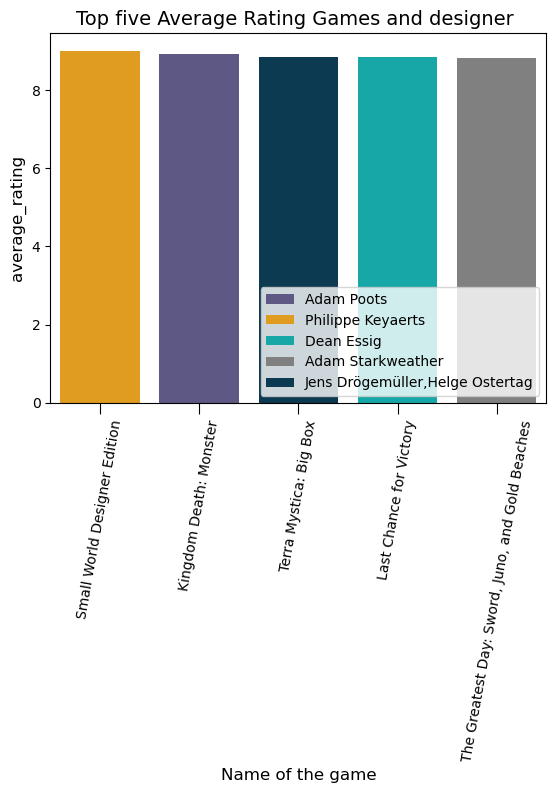

In [12]:
ax=sns.barplot(x='name', y='average_rating',hue='designer',dodge=False,palette=['#58508d','#ffa600',"c","grey","#003f5c"],data=topfive_games2,
               order=["Small World Designer Edition","Kingdom Death: Monster",'Terra Mystica: Big Box','Last Chance for Victory','The Greatest Day: Sword, Juno, and Gold Beaches']);
ax.legend(loc='lower right', ncol=1);
pt.title("Top five Average Rating Games and designer ",color="black",size=14)
ax.set_xlabel('Name of the game', fontdict={'fontsize' : 12});
ax.set_ylabel('average_rating', fontdict={'fontsize' : 12});
pt.tick_params(axis='x', labelrotation=80, size=8)

## 1.3
Additionally, I have ploted this graph in which we can see the year when the game was published, at glance we can see that late years games are having a better average rating. specially in 2015. with 4 games.The rest of the customization are the same just beacuse it is related to previous graphics. In my opinion, it is important to know the year Published of the top five rated games, because these are the best game in terms of rating.

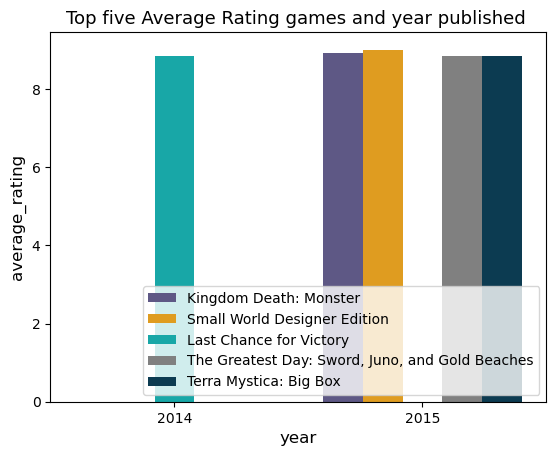

In [13]:
ax = sns.barplot(x='year_published', y='average_rating', hue='name',palette=['#58508d','#ffa600',"c","grey","#003f5c"],data=topfive_games2);
ax.legend(loc='lower right', ncol=1);
pt.title("Top five Average Rating games and year published ",color="black",size=13)
ax.set_xlabel('year', fontdict={'fontsize' : 12});
ax.set_ylabel('average_rating', fontdict={'fontsize' : 12});

## 2- Is there a correlation between the “users_rated” and the “max_playtime”?

Answer: Correlation between 'users_rated' and 'max_playtime' is an almost total negative correlation.

Stakeholders also would like to see if there is any correlation between 'users_rated' and 'max_playtime, I  have used the Pearson method for this correlation,which measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation(ScienceDirect, 2023), Sometimes correlation is better demonstrated by using numbers.

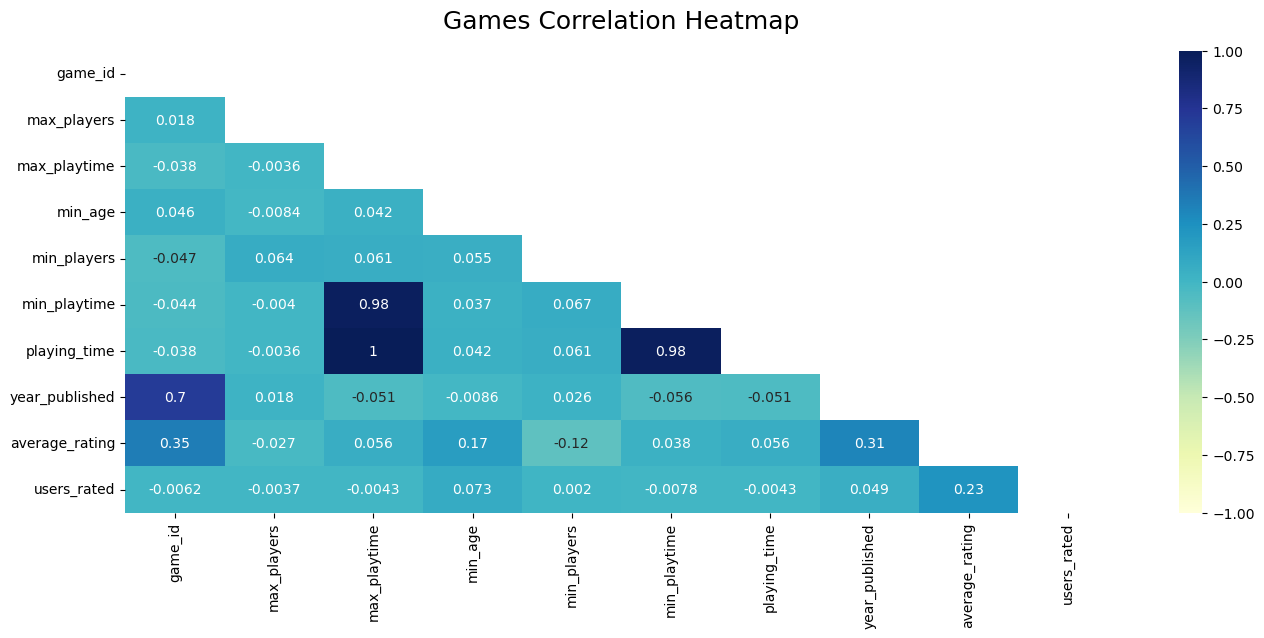

In [14]:
pt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(df.corr(method = "pearson"), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Games Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

The correlation heatmap above shows that **correlation between 'users_rated' and 'max_playtime' is an almost total negative correlation(-0.0043)** Which means that the fact that a game is played for long periods of time, that doesn't give the game a higher or lower rating by the players. A spectrum from blue to yellow were used because they are neutral and it helps to understand that a positive or negative correlation does not mean it is a good or bad result. I have decided to use heatmap becuase I can see not only correlation between two variable but all of them at the same time. So if stakeholder wants to see any other correlation between variales we have the answer here.

In order to display the correlation between the two variables , Using Scatter plots is usually the best option but after trying different scartter plots, I have realized that the heatmap looks much better and It is easy to understand for this specific case, but still I will leave this scatter plot here just to demonstrate why I went for the heatmap instead.
it would be more difficult for the stakeholder to understand this scatter plot than the heatmap.

<AxesSubplot:xlabel='max_playtime', ylabel='users_rated'>

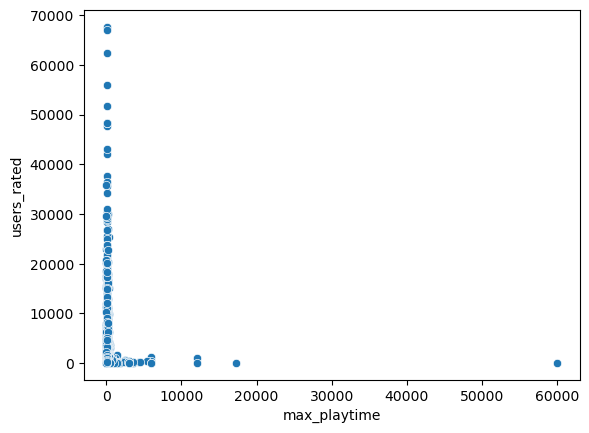

In [15]:
sns.scatterplot(data=df, x="max_playtime", y="users_rated")

## 3- What is the distribution of game categories? first answer

Answer: It has a positive skewed distribution.

I have given two answers to this question because I was not sure If stakeholder wants to know the distribution of the Catefories or the distribution of the categories based on the amount of games that belong to each category. 
In asnwer 1, I have Split all the categories separated by commas in column 'category' by using function str.split() and then made a list using function tolist()

In [16]:
Catfreq = [val.strip() for sublist in df.category.dropna().str.split(",").tolist() for val in sublist]
Catfreq

['Economic',
 'Negotiation',
 'Political',
 'Card Game',
 'Fantasy',
 'Abstract Strategy',
 'Medieval',
 'Ancient',
 'Economic',
 'Civilization',
 'Nautical',
 'Abstract Strategy',
 'Civilization',
 'Fantasy',
 'Exploration',
 'Fantasy',
 'Travel',
 'Card Game',
 'Farming',
 'Negotiation',
 'Ancient',
 'Mythology',
 'Negotiation',
 'Negotiation',
 'Bluffing',
 'Negotiation',
 'Science Fiction',
 'Economic',
 'Collectible Components',
 'Dice',
 'Fighting',
 'Print & Play',
 'Miniatures',
 'Racing',
 'Science Fiction',
 'American West',
 'Bluffing',
 'City Building',
 'Science Fiction',
 'Adventure',
 'Exploration',
 'Fantasy',
 'Fantasy',
 'Political',
 'Wargame',
 'Civilization',
 'Negotiation',
 'Political',
 'Science Fiction',
 'Space Exploration',
 'Wargame',
 'Exploration',
 'Fantasy',
 'Wargame',
 'Civilization',
 'Economic',
 'Medieval',
 'Renaissance',
 'Economic',
 'Political',
 'Wargame',
 'Card Game',
 'Humor',
 'Negotiation',
 'Political',
 'Fighting',
 'Humor',
 'Adventure'

The previous list was turned into a dataframe by using pd.dataframe. This way I can get the distribution.
I got the value count for each category using function value_count() this will help us to get the distribution for each category. 

In [17]:
df_1 = pd.DataFrame({'Categories': Catfreq})
df_1

,Categories
0,Economic
1,Negotiation
2,Political
3,Card Game
4,Fantasy
...,...
27415,Miniatures
27416,Racing
27417,Science Fiction
27418,Card Game


In [18]:
df_1['Categories'].value_counts()

Card Game                  2981
Wargame                    2034
Fantasy                    1218
Fighting                    900
Economic                    878
                           ... 
Pike and Shot                27
Game System                  22
American Indian Wars         15
Korean War                   14
Expansion for Base-game      11
Name: Categories, Length: 83, dtype: int64

Using fucntion pd.crosstab() I have created a new column out of the values counts, and now we can plot or get measure of central tendency to be able to determine the distritubion of categories.

In [19]:
categories_count = pd.crosstab(index=df_1['Categories'],columns='count')
categories_count

col_0,count
Categories,
Abstract Strategy,710
Action / Dexterity,514
Adventure,541
Age of Reason,83
American Civil War,131
...,...
Wargame,2034
Word Game,229
World War I,117


Using function describe() we got stats such mean, median, max , min. We can see that mean is much higher than median, which means that this data has a **Skewed distribution,** and the difference between min and max is enormous. We can say that Feature 'category' has outliers and a **highly positive skew distribution.** 

In [20]:
categories_count["count"].describe()

count      83.000000
mean      330.361446
std       435.786465
min        11.000000
25%        91.500000
50%       193.000000
75%       426.500000
max      2981.000000
Name: count, dtype: float64

I have plotted a barplot to show the outliers and each category frecuency, this way we can see where most of the categories are grouped. The color in this plot is only one, because I dont want to show the difference between each category but its frecuency. 

Text(0.5, 1.0, 'Game category distribution')

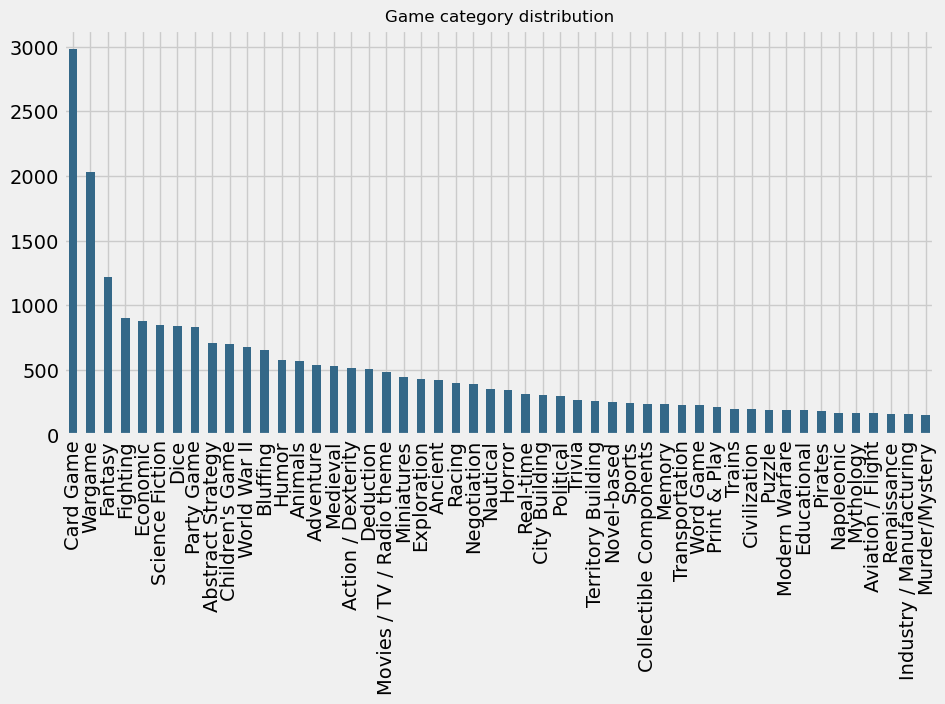

In [21]:
pt.style.use('fivethirtyeight')
df_1.Categories.value_counts().nlargest(50).plot(kind="bar", figsize=(10,5), color='#346888')
pt.title("Game category distribution",color="black",size=12)

Using a histogram is a good way to show distribution and if we add a density lines we can see how the data is more dense where we have more categories grouped together. Same color as previous graph was used to keep it the same style as we are talking about the same topic. The density curved lines tell us how skewed this data is and in this case we are talking about a **Positive skewed distribution**

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Game category distribution'}, xlabel='count', ylabel='Density'>

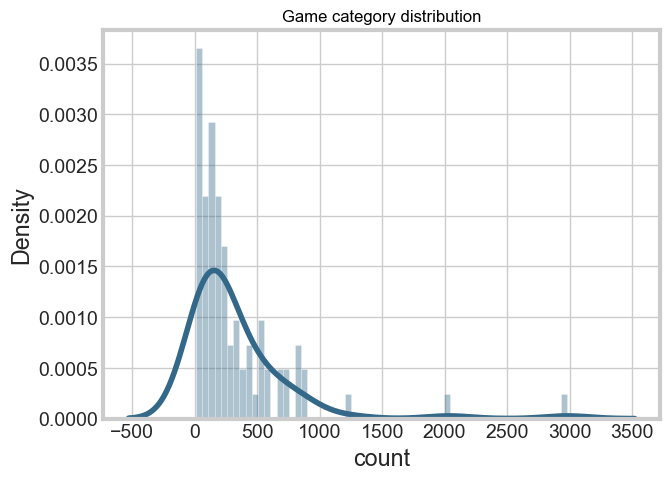

In [22]:
import seaborn as sns
pt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
pt.title("Game category distribution",color="black",size=12)
sns.distplot(categories_count["count"], color='#346888', bins=60)

## 3- What is the distribution of game categories? Second answer

Before, we saw that there are some mising values and this feature has some, therefore, I have removed them and cleaned it.
I have also created a Game category table count so we can see its distribution.  using method dropna() I removed all missing value from this feature.I didn't replace them because there were only 94 missing values which is not representative for a feature that has 10438 rows.

In [23]:
df = df.dropna(subset=['category'])

In [24]:
df['category'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10527    False
10528    False
10529    False
10530    False
10531    False
Name: category, Length: 10438, dtype: bool

In [25]:
df["category"].value_counts()

Wargame,World War II                                                                                   449
Card Game                                                                                              438
Abstract Strategy                                                                                      284
Napoleonic,Wargame                                                                                     124
Economic                                                                                               116
                                                                                                      ... 
Movies / TV / Radio theme,Party Game,Real-time                                                           1
Animals,Fighting,Humor                                                                                   1
Action / Dexterity,Children's Game,Collectible Components,Movies / TV / Radio theme,Science Fiction      1
Negotiation,Political,Religious,Renai

In [26]:
category_count_table = pd.crosstab(index=df['category'],columns='count')
category_count_table

col_0,count
category,
Abstract Strategy,284
"Abstract Strategy,Action / Dexterity",12
"Abstract Strategy,Action / Dexterity,Book,Card Game,Deduction,Dice,Negotiation,Word Game",1
"Abstract Strategy,Action / Dexterity,Children's Game",1
"Abstract Strategy,Action / Dexterity,Children's Game,Dice,Fantasy",1
...,...
"Wargame,World War II",449
Word Game,37
World War I,1


From the charts above we see that most games are in two main categories and the rest only have few games in it.
lets plot some graphs to show the actual distribution. 

In [27]:
category_count_table["count"].describe()

count    3860.000000
mean        2.704145
std        12.642801
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       449.000000
Name: count, dtype: float64

Usin describe method we get some statistics, and we can see that the mean is higher than median which means that this feature has a **postive skewed distribution,** this also means that there are some outliers affecting the mean.

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Game category distribution'}, xlabel='count', ylabel='Density'>

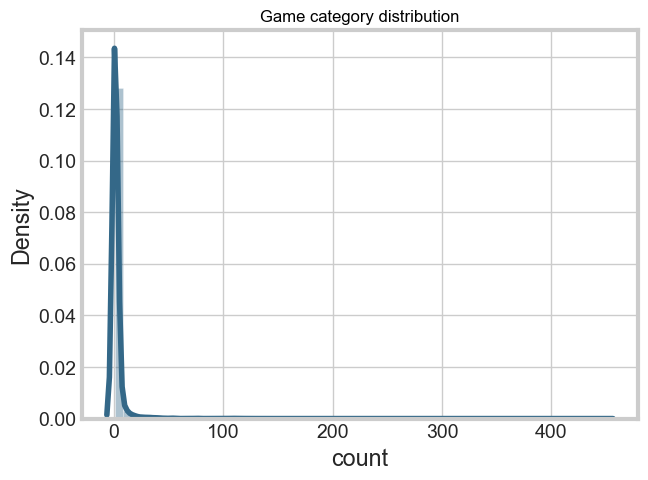

In [28]:
import seaborn as sns
pt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
pt.title("Game category distribution",color="black",size=12)
sns.distplot(category_count_table["count"], color='#346888', bins=60)



As expected the Category varaible has a positive skewed distribution, we can see that on the plot above but also it was clear when using method describe() it shows that the mean is greater than median.
thi is happening due to outliers . around 3 Game Categories are very different in numbers than the rest. and most categories are grouped around 1-50.
I have used histogram with density to show the curve of distribution. and also to show how outliers pull the mean to the right.

Text(0.5, 1.0, 'Game category distribution')

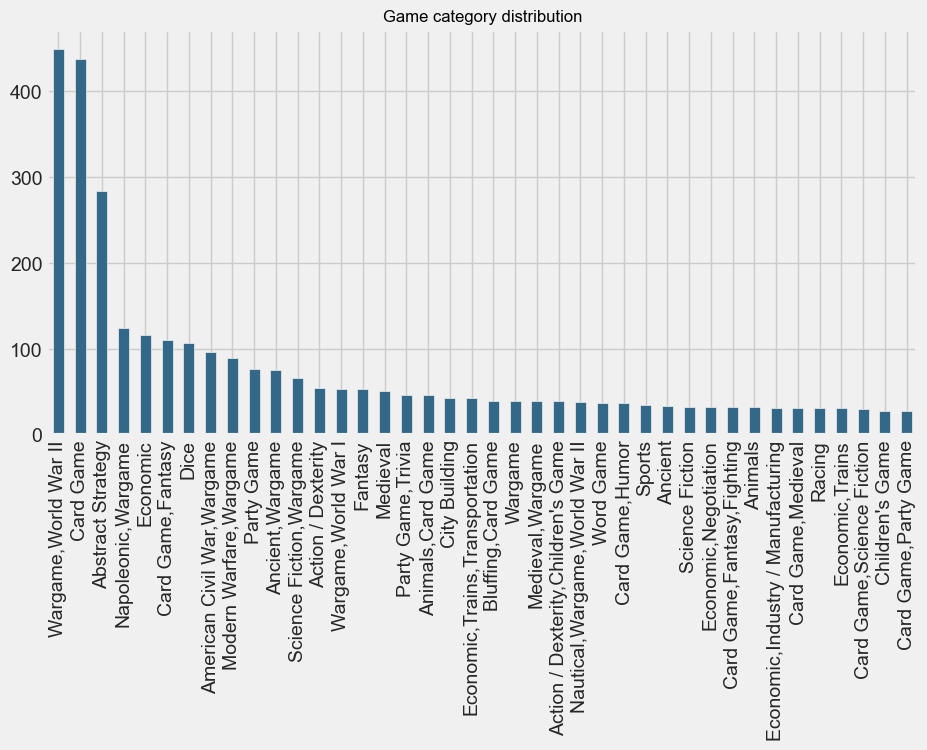

In [29]:
pt.style.use('fivethirtyeight')
df.category.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5), color='#346888')
pt.title("Game category distribution",color="black",size=12)

Using this barplot we clearly see the name of the 3 games categories which are outliers, therefore they are causing skewed distribution in this variable. I only used this barplot to compare the categories, not to show distritution itself. There was no need to change color because the outliers are seen clearly, and there are too many categories, we dont want to saturate this plot with too many colors.

Text(0.5, 1.0, 'Game category distribution')

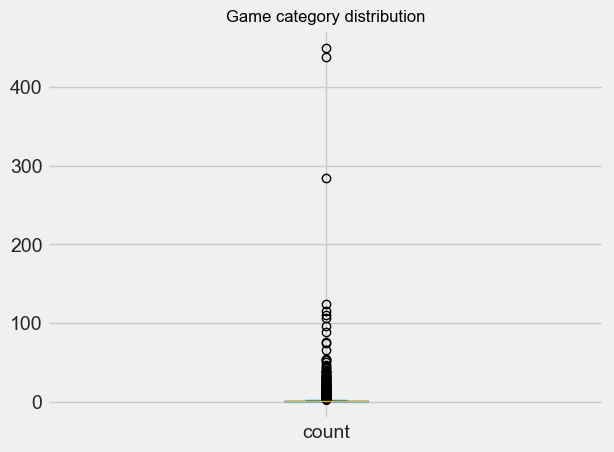

In [30]:
pt.style.use('fivethirtyeight')
category_count_table["count"].plot.box()
pt.title("Game category distribution",color="black",size=12)

Lastly I have used the box plot above just to show the distribution of this variable in a different way, where we can clearly see how most categories are grouped around 1 to 50 frecuency. 

In [31]:
skewness_category =category_count_table["count"].skew()
print(skewness_category)

26.11490037967392


## 4- Do older games (1992 and earlier) have a higher MEAN “average rating” than newer games (after 1992)?

Answer:  Newer games 1993 to 2016 have a higer mean that older games 1950 to 1992

In order to see the years in which the Mean has been higher or lower , firstly I need to know which one is min and max. Therefore we can find this out using those functions min() which returts the lowest number and max() which shows the higher number in a list.

In [32]:
max=df['year_published'].max()
min=df['year_published'].min()
print(max)
print(min)

2016
1950


In [33]:
df1= pd.read_csv('board_games.csv',parse_dates=['year_published'],index_col='year_published')

Now I have read the dataset again but this time the column 'year published' which contains dates, has been turned into index , this will help to plot it as datetime whithout converting or coding it.

using mean() wecan find out the mean of any numerical varible. in this case I have selected from the index which years I want to get the mean from.
and we Can see that newer games 1993 to 2016 have a higer mean that older games 1950 to 1992

In [34]:
df1['1950-01-01':'1992-01-01'].average_rating.mean()

6.035236628748702

In [35]:
df1['1993-01-01':'2016-01-01'].average_rating.mean()

6.44634885322168

In [36]:
data = {'Mean': [6.035,6.446],
        'Games':['Oldergames_mean','Newergames_mean'],
        'Years':['1950-1992','1993-2016']}
dfmean = pd.DataFrame(data)
dfmean.head

<bound method NDFrame.head of     Mean            Games      Years
0  6.035  Oldergames_mean  1950-1992
1  6.446  Newergames_mean  1993-2016>

I have created a dataset containing the mean of older and newer games , in this way I will be able to plot for a better visualization.

I plotted a barplot to compare the two means, clearly , we can see that newer games have higher avegerage Mean than older games.
colors aqua  is bright so is perfect to show that is bigger than dark blue(Older games), at the same time we can see the years next to each bar , easly we can see wich bar represent new games and older games.

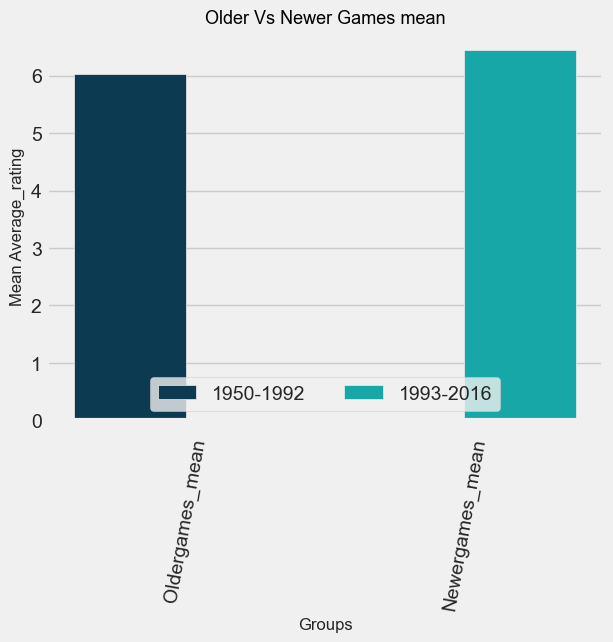

In [37]:
ax = sns.barplot(x='Games', y='Mean',palette=["#003f5c","c"], hue='Years', data=dfmean);
pt.style.use('fivethirtyeight')
ax.legend(loc='lower center', ncol=2);
pt.title("Older Vs Newer Games mean",color="black",size=13)
ax.set_xlabel('Groups', fontdict={'fontsize' : 12});
ax.set_ylabel('Mean Average_rating', fontdict={'fontsize' : 12});
pt.tick_params(axis='x', labelrotation=80, size=8)


In [38]:
df1['average_rating'].mean()

6.370855970376001

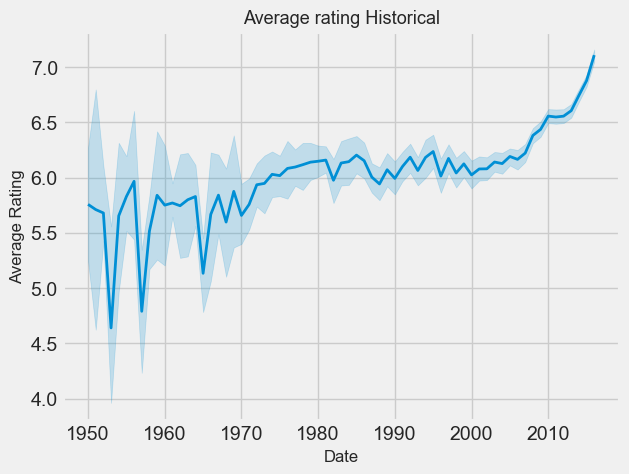

In [39]:
pt.style.use('fivethirtyeight')
data4=df
ax= sns.lineplot(x='year_published', y='average_rating',linestyle='solid',linewidth=2.0,data=data4) 

pt.title('Average rating Historical', size=13)
pt.xlabel('Date',size=12)
pt.ylabel('Average Rating',size=12)

pt.show()

Additionaly , I have plotte this lineplot to show a Historical view of Average rating from the first year to the last one.
using this lineplot we can see the behavior of this variable throughout the years and we can see how it was not easy for early years but eventually it has improved. therefore the average rating of newer games is higher. Thi is importan to measure perfomance withing a period of time. Line plots are very easy to understand when we want to display timeseries , the color matches with previous graph and the grid behind help us to match the lines with the Average rating.

## 5- What are the 3 most common “mechanics” in the dataset?

Answer: 

1. Hex-and-Counter

2. Hand Management

3. Dice Rolling 

Stakeholder would like to know what the 3 most commom Mechanics are, therefore I have used funtion value_counts() to be able to see from higher to lower all mechanics values. Based on its frecuency we can see below that most commom are Hex-and-Counter,Hand Management and Dice Rolling.

I have used Barplot to clearly visualize and compare these three  mechanics, they also have different colors for a better differentiation. Aqua to show the most commom because it is stronger color, then blue is more neutral and grey which shows less importance or hierarchy.

The name of each mechanic below the bar is very important to avoid any confusion. And the lines on the background help us to match the bars with the values. 

In [40]:
df['mechanic'].value_counts()

Hex-and-Counter                                                                                           523
Hand Management                                                                                           294
Dice Rolling                                                                                              220
Roll / Spin and Move                                                                                      196
Tile Placement                                                                                            164
                                                                                                         ... 
Hand Management,Pick-up and Deliver,Roll / Spin and Move                                                    1
Auction/Bidding,Hand Management,Variable Phase Order,Voting                                                 1
Route/Network Building,Simulation,Stock Holding                                                             1
Action Poi

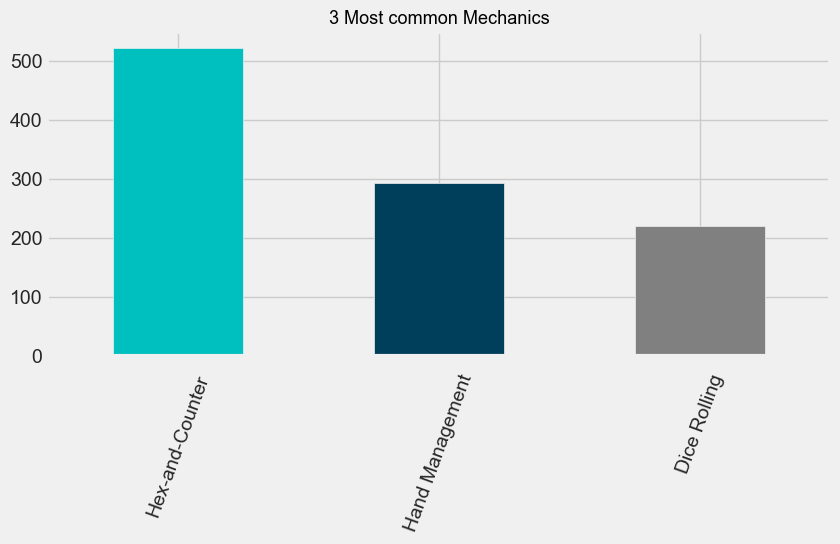

In [41]:
pt.style.use('fivethirtyeight')
df.mechanic.value_counts().nlargest(3).plot(kind="bar", figsize=(9,4), color=['c',"#003f5c",'grey'])
pt.title("3 Most common Mechanics",color="black",size=13)
ax.set_xlabel('Mechanic name', fontdict={'fontsize' : 12});
ax.set_ylabel('Frecuency', fontdict={'fontsize' : 12});
pt.tick_params(axis='x', labelrotation=70, size=8)

## 6- What are the top five 'users_rated' games? (my own question)

I have considered that it is statisticaly important to know what are those games that have received more rating by Users.
This is important beacuse based on this result we will know how interested users are on this games and how popular this games are.

In [42]:
data2 = df[['name', 'users_rated','average_rating']]
data2.head()

,name,users_rated,average_rating
0,Die Macher,4498,7.66508
1,Dragonmaster,478,6.60815
2,Samurai,12019,7.44119
3,Tal der Könige,314,6.60675
4,Acquire,15195,7.35830


In [43]:
top5=data2['users_rated'].nlargest(5)
top5.head()

12      67655
617     67056
5368    62377
5737    55930
6720    51688
Name: users_rated, dtype: int64

In [44]:
users_to_filter = [67655,67056,62377,55930,51688]
top5_games = data2[data2['users_rated'].isin(users_to_filter)]

top5_games.head()

,name,users_rated,average_rating
12,Catan,67655,7.26569
617,Carcassonne,67056,7.43536
5368,Pandemic,62377,7.67234
5737,Dominion,55930,7.69995
6720,7 Wonders,51688,7.83595


I have created a new dataset taken from the orinal one, I Have used funtion nlargest() to filter the top five User rated games and then I have filtered those values using funtion isin() this way I can get the name of the games and their avarage rating too.

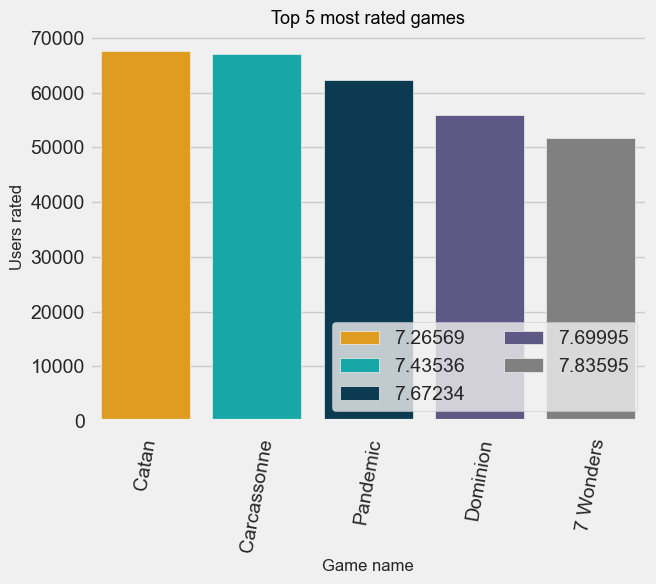

In [45]:
ax = sns.barplot(x='name', y='users_rated',hue='average_rating',palette=["#ffa600","c","#003f5c",'#58508d','grey'],dodge=False,data=top5_games);
ax.legend(loc='lower right', ncol=2);
pt.title("Top 5 most rated games",color="black",size=13)
ax.set_xlabel('Game name', fontdict={'fontsize' : 12});
ax.set_ylabel('Users rated', fontdict={'fontsize' : 12});
pt.tick_params(axis='x', labelrotation=80, size=8)

As a result we got this Barplot. I have use barplot because it is one of the best to compare feautures, and that is exactly what we are doing here. I have used same colors as previous bars to compare categories. I have displayed the frecueny , which mean how many user have rated this games. and also we can see avarage rating , these games are not only the most popular games but also they have and avareage rating that is higher than the mean average rating of all the games.

## Conclusion

In conclusion data visualization is an important part for anyone who is interested in Data Analytics.
Choosing the right colors, fonts, sizes, plots, titles, etc, is imperative when displaying data in form of graphs. 
As data  analysts we can understand different plots and visualization but we need to think out of the box, because visualizations will be seen by stakeholder and other people who are not literate in this field, therefore, plots must be easy to understan by anyone, they must be usuer friendly and easy to read. It is also important to know who is our public, who will be watching this presentations, understaning this, will help us to choose the right colors , graphs, etc.

There are different ways we can plot same information but not all of them will be clear and concise. Culture, country, age, education, all of them are important to us. Based of this, we can create much better visulizations.  


## Reference list

Matplotlib (2023). Available at: https://matplotlib.org/stable/tutorials/introductory/customizing.html(accessed: 12/04/2023)

Sciencedirect(2022). Available at: thttps://www.sciencedirect.com/topics/computer-science/pearson-correlation#:~:text=The%20Pearson%20correlation%20measures%20the,meaning%20a%20total%20positive%20correlation (accessed: 02/04/2023)

Boardgamesland (2020).Available at: https://boardgamesland.com/the-complete-history-of-board-games/(accessed: 18/04/2023)
Pauldesalvo (2023). Available at: https://www.pauldesalvo.com/how-to-break-up-a-comma-separated-string-in-a-pandas-column/(accessed: 15/04/2023)
